In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing=pd.read_csv('Housing.csv',skipinitialspace=False)

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0})
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea']=housing['prefarea'].map({'yes':1,'no':0})

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [7]:
housing=pd.concat([housing,status],axis=1)

In [8]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [9]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [10]:
housing['areapd']=housing['area']/housing['bedrooms']
housing['bbratio']=housing['bathrooms']/housing['bedrooms']

In [11]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areapd,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [12]:
def normalize(x):
    return ((x-np.min(x))/(max(x)-min(x)))

housing=housing.apply(normalize)

In [13]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areapd',
       'bbratio'],
      dtype='object')

In [14]:
x=housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areapd',
       'bbratio']]

y=housing['price']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [16]:
def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame(columns=['var','vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by='vif',axis=0, ascending=False, inplace=False)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()

In [19]:
rfe=RFE(lm,9)
rfe=rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False  True  True False  True False
 False  True  True]
[1 3 1 1 1 4 6 1 1 2 1 7 5 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [20]:
col=x_train.columns[rfe.support_]

In [21]:
col

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'prefarea', 'areapd', 'bbratio'],
      dtype='object')

In [22]:
x_train_rfe=x_train[col]

In [23]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)

In [24]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [25]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     80.14
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.88e-81
Time:                        06:11:54   Log-Likelihood:                 369.54
No. Observations:                 381   AIC:                            -719.1
Df Residuals:                     371   BIC:                            -679.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0139      0.021     

In [26]:
vif_cal(input_data=housing.drop(['area','bedrooms','stories','basement','semi-furnished','areapd'],axis=1), dependent_col='price')

,var,vif
8,bbratio,6.21
1,mainroad,4.66
0,bathrooms,2.78
5,parking,1.82
4,airconditioning,1.59
7,unfurnished,1.44
6,prefarea,1.41
2,guestroom,1.28
3,hotwaterheating,1.08


In [27]:
x_test_rfe=x_test[col]

In [28]:
x_test_rfe=sm.add_constant(x_test_rfe)
y_pred=lm.predict(x_test_rfe)
len(y_pred)

164

Text(0, 0.5, 'housing price')

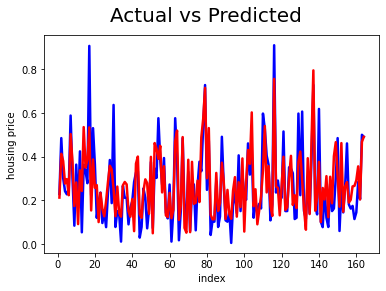

In [29]:
c=[i for i in range(1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('index',fontsize=10)
plt.ylabel('housing price',fontsize=10)

Text(0, 0.5, 'ytest_ypred')

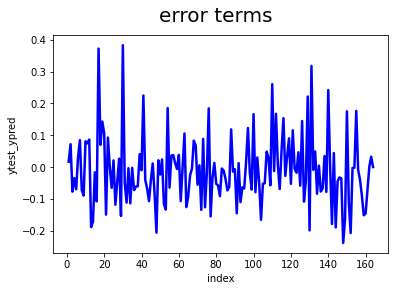

In [30]:
c=[i for i in range(1,165,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('error terms',fontsize=20)
plt.xlabel('index',fontsize=10)
plt.ylabel('ytest_ypred',fontsize=10)

Text(0, 0.5, 'x_test')

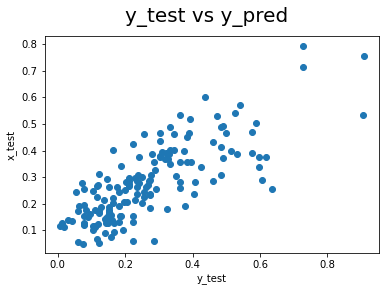

In [31]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('x_test',fontsize=10)

Text(0, 0.5, 'index')

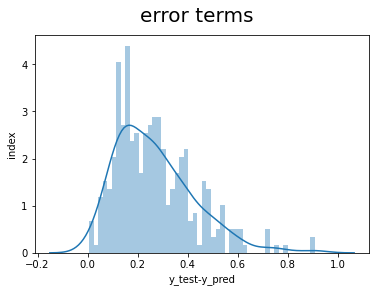

In [32]:
fig=plt.figure()
sns.distplot((y_test,y_pred),bins=50)
fig.suptitle('error terms', fontsize=20)
plt.xlabel('y_test-y_pred',fontsize=10)
plt.ylabel('index',fontsize=10)

In [34]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 0.1082035253813171
